# Python for Data Analysis

In [7]:
# %pprint
# %precision %0.3f
# %config IPCompleter.greedy=False

In [8]:
# Display full output of cell not just last line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [9]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# 10. Data Aggregation and Group Operations

In [10]:
import numpy as np
import pandas as pd

In [11]:
df = pd.DataFrame({'key1': ['a', 'a', 'b', 'b', 'a'],
                  'key2': ['one', 'two', 'one', 'two', 'one'],
                  'data1': np.random.randn(5),
                  'data2': np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,-1.589125,-2.317257
1,a,two,0.150869,0.398848
2,b,one,0.303162,-0.869452
3,b,two,1.574002,0.327647
4,a,one,-1.065442,1.043090


In [12]:
grouped = df['data1'].groupby(df['key1'])

In [13]:
type(grouped)

pandas.core.groupby.generic.SeriesGroupBy

In [14]:
for name, group in grouped:
    print(name)
    print(group)

a
0   -1.589125
1    0.150869
4   -1.065442
Name: data1, dtype: float64
b
2    0.303162
3    1.574002
Name: data1, dtype: float64


In [15]:
grouped.mean()

key1
a   -0.834566
b    0.938582
Name: data1, dtype: float64

In [16]:
grouped2 = df['data1'].groupby([df['key1'], df['key2']])
for name, group in grouped2:
    print(name)
    print(group)

('a', 'one')
0   -1.589125
4   -1.065442
Name: data1, dtype: float64
('a', 'two')
1    0.150869
Name: data1, dtype: float64
('b', 'one')
2    0.303162
Name: data1, dtype: float64
('b', 'two')
3    1.574002
Name: data1, dtype: float64


In [17]:
means = grouped2.mean()
means

key1  key2
a     one    -1.327283
      two     0.150869
b     one     0.303162
      two     1.574002
Name: data1, dtype: float64

In [18]:
means.unstack()

key2,one,two
key1,,
a,-1.327283,0.150869
b,0.303162,1.574002


In [19]:
type(means.unstack())

pandas.core.frame.DataFrame

In [20]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,-0.834566,-0.291773
b,0.938582,-0.270902


In [21]:
df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one  -1.327283 -0.637083
     two   0.150869  0.398848
b    one   0.303162 -0.869452
     two   1.574002  0.327647

In [22]:
for name, group in df.groupby(['key1', 'key2']):
    print(name)
    print(group)
print(type(group))

('a', 'one')
  key1 key2     data1     data2
0    a  one -1.589125 -2.317257
4    a  one -1.065442  1.043090
('a', 'two')
  key1 key2     data1     data2
1    a  two  0.150869  0.398848
('b', 'one')
  key1 key2     data1     data2
2    b  one  0.303162 -0.869452
('b', 'two')
  key1 key2     data1     data2
3    b  two  1.574002  0.327647
<class 'pandas.core.frame.DataFrame'>


In [23]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

In [24]:
list(df.groupby(['key1', 'key2']))[0][1]

,key1,key2,data1,data2
0,a,one,-1.589125,-2.317257
4,a,one,-1.065442,1.043090


In [25]:
pieces = list(df.groupby('key1'))
pieces

[('a',
    key1 key2     data1     data2
  0    a  one -1.589125 -2.317257
  1    a  two  0.150869  0.398848
  4    a  one -1.065442  1.043090),
 ('b',
    key1 key2     data1     data2
  2    b  one  0.303162 -0.869452
  3    b  two  1.574002  0.327647)]

In [26]:
type(pieces[0])

tuple

In [27]:
pieces[0][1]

,key1,key2,data1,data2
0,a,one,-1.589125,-2.317257
1,a,two,0.150869,0.398848
4,a,one,-1.065442,1.043090


In [28]:
grouped3 = df.groupby(['key1', 'key2'])

In [29]:
grouped3.max()

data1     data2
key1 key2                    
a    one  -1.065442  1.043090
     two   0.150869  0.398848
b    one   0.303162 -0.869452
     two   1.574002  0.327647

In [30]:
df

,key1,key2,data1,data2
0,a,one,-1.589125,-2.317257
1,a,two,0.150869,0.398848
2,b,one,0.303162,-0.869452
3,b,two,1.574002,0.327647
4,a,one,-1.065442,1.043090


In [31]:
groups = df.groupby(['key1', 'key2'])['data1']

In [32]:
type(groups)

pandas.core.groupby.generic.SeriesGroupBy

In [33]:
groups.sum()

key1  key2
a     one    -2.654567
      two     0.150869
b     one     0.303162
      two     1.574002
Name: data1, dtype: float64

In [34]:
for name, group in groups:
    print(name)
    print(group)

('a', 'one')
0   -1.589125
4   -1.065442
Name: data1, dtype: float64
('a', 'two')
1    0.150869
Name: data1, dtype: float64
('b', 'one')
2    0.303162
Name: data1, dtype: float64
('b', 'two')
3    1.574002
Name: data1, dtype: float64


In [35]:
people = pd.DataFrame(np.random.randn(5, 5),
                    columns=['a', 'b', 'c', 'd', 'e'],
                    index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people

,a,b,c,d,e
Joe,0.004065,1.606593,-0.251848,-1.610641,-0.347703
Steve,-0.527750,0.279341,0.860782,-0.420913,-1.222421
Wes,-0.074140,-0.122528,1.622870,-0.192834,0.300481
Jim,0.399212,1.003313,-0.695893,1.471587,0.578110
Travis,0.088649,-0.417356,-2.801850,1.214113,-0.424798


In [36]:
people.iloc[2:3, [1, 2]] = np.nan # Add a few NA values
people

,a,b,c,d,e
Joe,0.004065,1.606593,-0.251848,-1.610641,-0.347703
Steve,-0.527750,0.279341,0.860782,-0.420913,-1.222421
Wes,-0.074140,NaN,NaN,-0.192834,0.300481
Jim,0.399212,1.003313,-0.695893,1.471587,0.578110
Travis,0.088649,-0.417356,-2.801850,1.214113,-0.424798


In [37]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue', 'd': 'blue', 'e': 'red', 'f' : 'orange'}
by_column = people.groupby(mapping, axis=1)

In [38]:
for name, group in by_column:
    print(name)
    print(group)
    print('\r\n')

blue
               c         d
Joe    -0.251848 -1.610641
Steve   0.860782 -0.420913
Wes          NaN -0.192834
Jim    -0.695893  1.471587
Travis -2.801850  1.214113


red
               a         b         e
Joe     0.004065  1.606593 -0.347703
Steve  -0.527750  0.279341 -1.222421
Wes    -0.074140       NaN  0.300481
Jim     0.399212  1.003313  0.578110
Travis  0.088649 -0.417356 -0.424798




In [39]:
by_column.sum()

,blue,red
Joe,-1.862489,1.262956
Steve,0.439869,-1.470830
Wes,-0.192834,0.226341
Jim,0.775694,1.980636
Travis,-1.587737,-0.753505


In [40]:
by_column2 = people.groupby(['RED', 'RED', 'BLUE', 'BLUE', 'RED'], axis=1)
by_column2.sum()

,BLUE,RED
Joe,-1.862489,1.262956
Steve,0.439869,-1.470830
Wes,-0.192834,0.226341
Jim,0.775694,1.980636
Travis,-1.587737,-0.753505


In [41]:
by_column2.size()

BLUE    2
RED     3
dtype: int64

In [42]:
by_column2.count()

,BLUE,RED
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


In [43]:
for name, group in people.groupby(len):
    print(name)
    print(group)

3
            a         b         c         d         e
Joe  0.004065  1.606593 -0.251848 -1.610641 -0.347703
Wes -0.074140       NaN       NaN -0.192834  0.300481
Jim  0.399212  1.003313 -0.695893  1.471587  0.578110
5
             a         b         c         d         e
Steve -0.52775  0.279341  0.860782 -0.420913 -1.222421
6
               a         b        c         d         e
Travis  0.088649 -0.417356 -2.80185  1.214113 -0.424798


In [44]:
people.groupby(len).sum()

,a,b,c,d,e
3,0.329137,2.609906,-0.947741,-0.331888,0.530889
5,-0.527750,0.279341,0.860782,-0.420913,-1.222421
6,0.088649,-0.417356,-2.801850,1.214113,-0.424798


In [45]:
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).min()

a         b         c         d         e
3 one -0.074140  1.606593 -0.251848 -1.610641 -0.347703
  two  0.399212  1.003313 -0.695893  1.471587  0.578110
5 one -0.527750  0.279341  0.860782 -0.420913 -1.222421
6 two  0.088649 -0.417356 -2.801850  1.214113 -0.424798

In [46]:
for name, group in people.groupby([len, key_list]):
    print(name)
    print(group)

(3, 'one')
            a         b         c         d         e
Joe  0.004065  1.606593 -0.251848 -1.610641 -0.347703
Wes -0.074140       NaN       NaN -0.192834  0.300481
(3, 'two')
            a         b         c         d        e
Jim  0.399212  1.003313 -0.695893  1.471587  0.57811
(5, 'one')
             a         b         c         d         e
Steve -0.52775  0.279341  0.860782 -0.420913 -1.222421
(6, 'two')
               a         b        c         d         e
Travis  0.088649 -0.417356 -2.80185  1.214113 -0.424798


In [47]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'], [1, 3, 5, 1, 3]],
                                    names=['cty', 'tenor'])
hier_df = pd.DataFrame(np.random.randn(4, 5), columns=columns)
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0     -0.323381 -0.651411 -0.821324 -0.039846  0.696001
1      0.404270  0.885994 -0.250316  1.536651 -0.198958
2     -0.321564  1.348172  0.984084  1.986798  0.603265
3     -0.333260 -0.127496 -0.714596 -0.509489 -0.237752

In [48]:
by_column_level = hier_df.groupby(level='cty', axis=1)
for name, group in by_column_level:
    print(name)
    print(group)

JP
cty          JP          
tenor         1         3
0     -0.039846  0.696001
1      1.536651 -0.198958
2      1.986798  0.603265
3     -0.509489 -0.237752
US
cty          US                    
tenor         1         3         5
0     -0.323381 -0.651411 -0.821324
1      0.404270  0.885994 -0.250316
2     -0.321564  1.348172  0.984084
3     -0.333260 -0.127496 -0.714596


In [49]:
by_column_level.first()

cty,JP,US
0,-0.039846,-0.323381
1,1.536651,0.404270
2,1.986798,-0.321564
3,-0.509489,-0.333260


In [50]:
by_column_level.min()

cty,JP,US
0,-0.039846,-0.821324
1,-0.198958,-0.250316
2,0.603265,-0.321564
3,-0.509489,-0.714596


## 10.2 Data Aggregation

In [51]:
tips = pd.read_csv('examples/tips.csv')
# Add tip percentage of total bill
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:6]

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
5,25.29,4.71,No,Sun,Dinner,4,0.186240


In [52]:
len(tips)

244

In [53]:
grouped = tips.groupby(['day', 'smoker'])

In [54]:
grouped_pct = grouped['tip_pct']
print(grouped_pct)

In [55]:
for name, group in grouped:
    print(name)
    print(group)

('Fri', 'No')
     total_bill   tip smoker  day    time  size   tip_pct
91        22.49  3.50     No  Fri  Dinner     2  0.155625
94        22.75  3.25     No  Fri  Dinner     2  0.142857
99        12.46  1.50     No  Fri  Dinner     2  0.120385
223       15.98  3.00     No  Fri   Lunch     3  0.187735
('Fri', 'Yes')
     total_bill   tip smoker  day    time  size   tip_pct
90        28.97  3.00    Yes  Fri  Dinner     2  0.103555
92         5.75  1.00    Yes  Fri  Dinner     2  0.173913
93        16.32  4.30    Yes  Fri  Dinner     2  0.263480
95        40.17  4.73    Yes  Fri  Dinner     4  0.117750
96        27.28  4.00    Yes  Fri  Dinner     2  0.146628
97        12.03  1.50    Yes  Fri  Dinner     2  0.124688
98        21.01  3.00    Yes  Fri  Dinner     2  0.142789
100       11.35  2.50    Yes  Fri  Dinner     2  0.220264
101       15.38  3.00    Yes  Fri  Dinner     2  0.195059
220       12.16  2.20    Yes  Fri   Lunch     2  0.180921
221       13.42  3.48    Yes  Fri   Lunch  

In [56]:
grouped_pct.agg('mean')

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [57]:
def peak_to_peak(arr):
    return arr.max() - arr.min()

In [58]:
grouped_pct.agg(['mean', 'std', peak_to_peak])

mean       std  peak_to_peak
day  smoker                                  
Fri  No      0.151650  0.028123      0.067349
     Yes     0.174783  0.051293      0.159925
Sat  No      0.158048  0.039767      0.235193
     Yes     0.147906  0.061375      0.290095
Sun  No      0.160113  0.042347      0.193226
     Yes     0.187250  0.154134      0.644685
Thur No      0.160298  0.038774      0.193350
     Yes     0.163863  0.039389      0.151240

In [59]:
functions = ['count', 'mean', 'max']
result = grouped['tip_pct', 'total_bill'].agg(functions)
result

c:\users\walid\appdata\local\programs\python\python37\environments\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.151650  0.187735          4  18.420000  22.75
     Yes         15  0.174783  0.263480         15  16.813333  40.17
Sat  No          45  0.158048  0.291990         45  19.661778  48.33
     Yes         42  0.147906  0.325733         42  21.276667  50.81
Sun  No          57  0.160113  0.252672         57  20.506667  48.17
     Yes         19  0.187250  0.710345         19  24.120000  45.35
Thur No          45  0.160298  0.266312         45  17.113111  41.19
     Yes         17  0.163863  0.241255         17  19.190588  43.11

In [60]:
grouped.agg({'tip' : np.max, 'size' : 'sum'})

tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40

In [61]:
grouped.agg({'tip' : ['min', 'max'], 'size' : ['sum']})

tip        size
              min    max  sum
day  smoker                  
Fri  No      1.50   3.50    9
     Yes     1.00   4.73   31
Sat  No      1.00   9.00  115
     Yes     1.00  10.00  104
Sun  No      1.01   6.00  167
     Yes     1.50   6.50   49
Thur No      1.25   6.70  112
     Yes     2.00   5.00   40

In [62]:
tips.groupby(['day', 'smoker'], as_index=False).mean()

,day,smoker,total_bill,tip,size,tip_pct
0,Fri,No,18.420000,2.812500,2.250000,0.151650
1,Fri,Yes,16.813333,2.714000,2.066667,0.174783
2,Sat,No,19.661778,3.102889,2.555556,0.158048
3,Sat,Yes,21.276667,2.875476,2.476190,0.147906
4,Sun,No,20.506667,3.167895,2.929825,0.160113
5,Sun,Yes,24.120000,3.516842,2.578947,0.187250
6,Thur,No,17.113111,2.673778,2.488889,0.160298
7,Thur,Yes,19.190588,3.030000,2.352941,0.163863


In [63]:
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,No,Sat,Dinner,2,0.098204


In [64]:
tips.agg(['std', 'min', 'max', 'mean'])

,total_bill,tip,smoker,day,time,size,tip_pct
std,8.902412,1.383638,NaN,NaN,NaN,0.951100,0.061072
min,3.070000,1.000000,No,Fri,Dinner,1.000000,0.035638
max,50.810000,10.000000,Yes,Thur,Lunch,6.000000,0.710345
mean,19.785943,2.998279,NaN,NaN,NaN,2.569672,0.160803


In [65]:
df['key1']

0    a
1    a
2    b
3    b
4    a
Name: key1, dtype: object

## 10.3 Apply: General split-apply-combine

In [66]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]

In [67]:
top(tips)

,total_bill,tip,smoker,day,time,size,tip_pct
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


In [68]:
tips.groupby('smoker').apply(top)

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

What has happened here? The top function is called on each row group from the
DataFrame, and then the results are glued together using pandas.concat, labeling the
pieces with the group names. The result therefore has a hierarchical index whose
inner level contains index values from the original DataFrame.

In [69]:
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')

total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                             
No     Fri  94        22.75   3.25     No   Fri  Dinner     2  0.142857
       Sat  212       48.33   9.00     No   Sat  Dinner     4  0.186220
       Sun  156       48.17   5.00     No   Sun  Dinner     6  0.103799
       Thur 142       41.19   5.00     No  Thur   Lunch     5  0.121389
Yes    Fri  95        40.17   4.73    Yes   Fri  Dinner     4  0.117750
       Sat  170       50.81  10.00    Yes   Sat  Dinner     3  0.196812
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3  0.077178
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4  0.115982

In [70]:
result = tips.groupby('smoker')['tip_pct'].describe()
result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


In [71]:
tips.groupby('smoker', group_keys=False).apply(top)

,total_bill,tip,smoker,day,time,size,tip_pct
88,24.71,5.85,No,Thur,Lunch,2,0.236746
185,20.69,5.00,No,Sun,Dinner,5,0.241663
51,10.29,2.60,No,Sun,Dinner,2,0.252672
149,7.51,2.00,No,Thur,Lunch,2,0.266312
232,11.61,3.39,No,Sat,Dinner,2,0.291990
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


## 10.4 Pivot Tables and Cross-Tabulation

In [72]:
tips.pivot_table(index=['day', 'smoker'])

size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.151650   18.420000
     Yes     2.066667  2.714000  0.174783   16.813333
Sat  No      2.555556  3.102889  0.158048   19.661778
     Yes     2.476190  2.875476  0.147906   21.276667
Sun  No      2.929825  3.167895  0.160113   20.506667
     Yes     2.578947  3.516842  0.187250   24.120000
Thur No      2.488889  2.673778  0.160298   17.113111
     Yes     2.352941  3.030000  0.163863   19.190588

In [73]:
tips.groupby(['day', 'smoker']).mean() # same result using groupby()

total_bill       tip      size   tip_pct
day  smoker                                          
Fri  No       18.420000  2.812500  2.250000  0.151650
     Yes      16.813333  2.714000  2.066667  0.174783
Sat  No       19.661778  3.102889  2.555556  0.158048
     Yes      21.276667  2.875476  2.476190  0.147906
Sun  No       20.506667  3.167895  2.929825  0.160113
     Yes      24.120000  3.516842  2.578947  0.187250
Thur No       17.113111  2.673778  2.488889  0.160298
     Yes      19.190588  3.030000  2.352941  0.163863

In [74]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'], columns='smoker')

size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.139622  0.165347
       Sat   2.555556  2.476190  0.158048  0.147906
       Sun   2.929825  2.578947  0.160113  0.187250
       Thur  2.000000       NaN  0.159744       NaN
Lunch  Fri   3.000000  1.833333  0.187735  0.188937
       Thur  2.500000  2.352941  0.160311  0.163863

In [75]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'], columns='smoker', margins=True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
time   day                                                             
Dinner Fri   2.000000  2.222222  2.166667  0.139622  0.165347  0.158916
       Sat   2.555556  2.476190  2.517241  0.158048  0.147906  0.153152
       Sun   2.929825  2.578947  2.842105  0.160113  0.187250  0.166897
       Thur  2.000000       NaN  2.000000  0.159744       NaN  0.159744
Lunch  Fri   3.000000  1.833333  2.000000  0.187735  0.188937  0.188765
       Thur  2.500000  2.352941  2.459016  0.160311  0.163863  0.161301
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

In [76]:
#Here, the All values are means without taking into account smoker versus nonsmoker (the All columns) or any of the two levels of grouping on the rows (the All
#row).

In [77]:
tips.pivot_table('tip_pct', index=['time', 'smoker'], columns='day', aggfunc='count', margins=True)

day             Fri   Sat   Sun  Thur  All
time   smoker                             
Dinner No       3.0  45.0  57.0   1.0  106
       Yes      9.0  42.0  19.0   NaN   70
Lunch  No       1.0   NaN   NaN  44.0   45
       Yes      6.0   NaN   NaN  17.0   23
All            19.0  87.0  76.0  62.0  244

In [78]:
tips.pivot_table('tip_pct', index=['time', 'smoker'], columns='day', aggfunc=len, margins=True)

day             Fri   Sat   Sun  Thur    All
time   smoker                               
Dinner No       3.0  45.0  57.0   1.0  106.0
       Yes      9.0  42.0  19.0   NaN   70.0
Lunch  No       1.0   NaN   NaN  44.0   45.0
       Yes      6.0   NaN   NaN  17.0   23.0
All            19.0  87.0  76.0  62.0  244.0

In [79]:
#A cross-tabulation (or crosstab for short) is a special case of a pivot table that com‐putes group frequencies.

In [80]:
ct = pd.crosstab([tips.time, tips.day], tips.smoker, margins=True)
ct

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

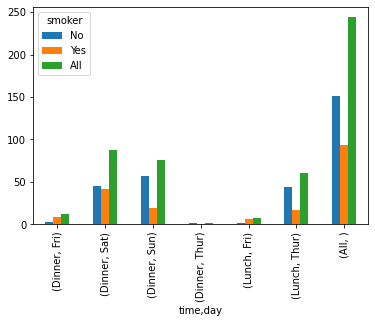

In [81]:
ct.plot.bar()

In [82]:
tips.groupby(['time', 'day']).agg({'smoker':'count'})

smoker
time   day         
Dinner Fri       12
       Sat       87
       Sun       76
       Thur       1
Lunch  Fri        7
       Thur      61

In [83]:
#Another way for Crosstab using a pivot_table
tips.pivot_table('size', columns='smoker', index=['time', 'day'], aggfunc=len, margins=True)

smoker          No   Yes  All
time   day                   
Dinner Fri     3.0   9.0   12
       Sat    45.0  42.0   87
       Sun    57.0  19.0   76
       Thur    1.0   NaN    1
Lunch  Fri     1.0   6.0    7
       Thur   44.0  17.0   61
All          151.0  93.0  244

# 11. Time Series

In [84]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
        datetime(2011, 1, 7), datetime(2011, 1, 8),
        datetime(2011, 1, 10), datetime(2011, 1, 12)]

ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02    1.498016
2011-01-05   -1.206213
2011-01-07   -1.864712
2011-01-08   -0.438916
2011-01-10    0.314049
2011-01-12    0.637688
dtype: float64

In [85]:
ts + ts[::2]

2011-01-02    2.996032
2011-01-05         NaN
2011-01-07   -3.729424
2011-01-08         NaN
2011-01-10    0.628097
2011-01-12         NaN
dtype: float64

In [86]:
ts[::2]

2011-01-02    1.498016
2011-01-07   -1.864712
2011-01-10    0.314049
dtype: float64

In [87]:
ts[datetime(2011, 1, 7):]

2011-01-07   -1.864712
2011-01-08   -0.438916
2011-01-10    0.314049
2011-01-12    0.637688
dtype: float64

In [88]:
ts['2011/1/6':'2011/1/11']

2011-01-07   -1.864712
2011-01-08   -0.438916
2011-01-10    0.314049
dtype: float64

In [89]:
resampler = ts.resample('D')
resampler

In [90]:
pd.date_range('2020-01-01', '2020-03-31', freq='B')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-20', '2020-01-21', '2020-01-22',
               '2020-01-23', '2020-01-24', '2020-01-27', '2020-01-28',
               '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-03',
               '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07',
               '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
               '2020-02-14', '2020-02-17', '2020-02-18', '2020-02-19',
               '2020-02-20', '2020-02-21', '2020-02-24', '2020-02-25',
               '2020-02-26', '2020-02-27', '2020-02-28', '2020-03-02',
               '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06',
               '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
               '2020-03-13', '2020-03-16', '2020-03-17', '2020-03-18',
      

In [91]:
pd.date_range('2020-01-01', '2020-01-05', freq='4H')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 04:00:00',
               '2020-01-01 08:00:00', '2020-01-01 12:00:00',
               '2020-01-01 16:00:00', '2020-01-01 20:00:00',
               '2020-01-02 00:00:00', '2020-01-02 04:00:00',
               '2020-01-02 08:00:00', '2020-01-02 12:00:00',
               '2020-01-02 16:00:00', '2020-01-02 20:00:00',
               '2020-01-03 00:00:00', '2020-01-03 04:00:00',
               '2020-01-03 08:00:00', '2020-01-03 12:00:00',
               '2020-01-03 16:00:00', '2020-01-03 20:00:00',
               '2020-01-04 00:00:00', '2020-01-04 04:00:00',
               '2020-01-04 08:00:00', '2020-01-04 12:00:00',
               '2020-01-04 16:00:00', '2020-01-04 20:00:00',
               '2020-01-05 00:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [92]:
pd.date_range('2020-01-01', '2020-06-05', freq='WOM-3Fri') # dates for 3rd Friday of each month

DatetimeIndex(['2020-01-17', '2020-02-21', '2020-03-20', '2020-04-17',
               '2020-05-15'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

In [93]:
ts = pd.Series(np.random.randn(4), index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31   -0.153106
2000-02-29    0.087248
2000-03-31    0.196301
2000-04-30   -0.008409
Freq: M, dtype: float64

In [94]:
ts.shift(1)

2000-01-31         NaN
2000-02-29   -0.153106
2000-03-31    0.087248
2000-04-30    0.196301
Freq: M, dtype: float64

In [95]:
ts / ts.shift(1) - 1 #easy way to calculate forward percentage daily change by shifting data

2000-01-31         NaN
2000-02-29   -1.569853
2000-03-31    1.249932
2000-04-30   -1.042838
Freq: M, dtype: float64

In [96]:
ts.shift(3, freq='D') # also you can shift the index itself by a certain period

2000-02-03   -0.153106
2000-03-03    0.087248
2000-04-03    0.196301
2000-05-03   -0.008409
dtype: float64

In [97]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)

In [98]:
now + MonthEnd(-2)

Timestamp('2011-09-30 00:00:00')

In [99]:
#A creative use of date offsets is to use these methods with groupby:
offset = MonthEnd()
ts = pd.Series(np.random.randn(20), index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts

2000-01-15    0.043741
2000-01-19   -0.363271
2000-01-23    0.609929
2000-01-27   -0.444390
2000-01-31    0.315151
2000-02-04   -0.004045
2000-02-08    0.941652
2000-02-12   -1.708676
2000-02-16    0.365160
2000-02-20   -0.035960
2000-02-24   -0.539625
2000-02-28   -2.436098
2000-03-03    0.270116
2000-03-07   -0.949615
2000-03-11   -0.086899
2000-03-15   -0.381528
2000-03-19    0.940467
2000-03-23   -1.432114
2000-03-27   -0.256733
2000-03-31    0.801784
Freq: 4D, dtype: float64

In [100]:
ts.groupby(offset.rollforward).mean()

2000-01-31    0.032232
2000-02-29   -0.488227
2000-03-31   -0.136815
dtype: float64

In [101]:
ts.resample('M').mean() # acheiving same result of groupby and MonthEnd() using resample()

2000-01-31    0.032232
2000-02-29   -0.488227
2000-03-31   -0.136815
Freq: M, dtype: float64

# 11.4 Time Zone Handling

In [102]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [103]:
tz = pytz.timezone('Europe/London')
tz.zone

'Europe/London'

In [104]:
dt = datetime.now()
dt

datetime.datetime(2020, 7, 25, 19, 20, 38, 886566)

In [105]:
dt.astimezone(tz)

datetime.datetime(2020, 7, 25, 18, 20, 38, 886566, tzinfo=<DstTzInfo 'Europe/London' BST+1:00:00 DST>)

In [106]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D') # no time zone info
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -0.063068
2012-03-10 09:30:00   -0.042317
2012-03-11 09:30:00    1.436648
2012-03-12 09:30:00   -0.080124
2012-03-13 09:30:00    1.624482
2012-03-14 09:30:00   -0.435683
Freq: D, dtype: float64

In [107]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D', tz='Africa/Cairo') # localized to Cairo, Egypt +2
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00+02:00   -1.014907
2012-03-10 09:30:00+02:00   -0.515510
2012-03-11 09:30:00+02:00   -0.117042
2012-03-12 09:30:00+02:00   -0.235991
2012-03-13 09:30:00+02:00    0.420546
2012-03-14 09:30:00+02:00    0.318426
Freq: D, dtype: float64

In [108]:
ts.tz_convert('Europe/London') # convert is used because ts time is already localized when created

2012-03-09 07:30:00+00:00   -1.014907
2012-03-10 07:30:00+00:00   -0.515510
2012-03-11 07:30:00+00:00   -0.117042
2012-03-12 07:30:00+00:00   -0.235991
2012-03-13 07:30:00+00:00    0.420546
2012-03-14 07:30:00+00:00    0.318426
Freq: D, dtype: float64

In [109]:
ts.index

DatetimeIndex(['2012-03-09 09:30:00+02:00', '2012-03-10 09:30:00+02:00',
               '2012-03-11 09:30:00+02:00', '2012-03-12 09:30:00+02:00',
               '2012-03-13 09:30:00+02:00', '2012-03-14 09:30:00+02:00'],
              dtype='datetime64[ns, Africa/Cairo]', freq='D')

In [110]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D') # no time zone info
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -0.000937
2012-03-10 09:30:00   -1.356364
2012-03-11 09:30:00    0.430743
2012-03-12 09:30:00   -0.226439
2012-03-13 09:30:00    1.258636
2012-03-14 09:30:00   -0.744934
Freq: D, dtype: float64

In [111]:
#localize to New York
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern # now hours difference due to DST

2012-03-09 09:30:00-05:00   -0.000937
2012-03-10 09:30:00-05:00   -1.356364
2012-03-11 09:30:00-04:00    0.430743
2012-03-12 09:30:00-04:00   -0.226439
2012-03-13 09:30:00-04:00    1.258636
2012-03-14 09:30:00-04:00   -0.744934
Freq: D, dtype: float64

In [112]:
# Convert to UTC
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -0.000937
2012-03-10 14:30:00+00:00   -1.356364
2012-03-11 13:30:00+00:00    0.430743
2012-03-12 13:30:00+00:00   -0.226439
2012-03-13 13:30:00+00:00    1.258636
2012-03-14 13:30:00+00:00   -0.744934
Freq: D, dtype: float64

In [113]:
ts_eastern.index.tz_convert('UTC')

DatetimeIndex(['2012-03-09 14:30:00+00:00', '2012-03-10 14:30:00+00:00',
               '2012-03-11 13:30:00+00:00', '2012-03-12 13:30:00+00:00',
               '2012-03-13 13:30:00+00:00', '2012-03-14 13:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [114]:
ts_eastern

2012-03-09 09:30:00-05:00   -0.000937
2012-03-10 09:30:00-05:00   -1.356364
2012-03-11 09:30:00-04:00    0.430743
2012-03-12 09:30:00-04:00   -0.226439
2012-03-13 09:30:00-04:00    1.258636
2012-03-14 09:30:00-04:00   -0.744934
Freq: D, dtype: float64

In [115]:
# Time zone arithmatic will observe time of DST change and add / substract one hour accordingly
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-11 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-11 01:30:00-0500', tz='US/Eastern')

In [116]:
stamp + Hour()

Timestamp('2012-03-11 03:30:00-0400', tz='US/Eastern')

In [117]:
stamp.day_name()

'Sunday'

In [118]:
# Operations on different time zones
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00   -1.092888
2012-03-08 09:30:00   -1.300859
2012-03-09 09:30:00    0.052659
2012-03-12 09:30:00   -0.376562
2012-03-13 09:30:00    0.298911
2012-03-14 09:30:00   -0.011711
2012-03-15 09:30:00   -0.872359
2012-03-16 09:30:00   -0.812904
2012-03-19 09:30:00   -0.879774
2012-03-20 09:30:00   -0.261724
Freq: B, dtype: float64

In [119]:
ts1 = ts[:7].tz_localize('Europe/London')
ts1
ts2 = ts1[2:].tz_convert('Europe/Moscow')
ts2

2012-03-07 09:30:00+00:00   -1.092888
2012-03-08 09:30:00+00:00   -1.300859
2012-03-09 09:30:00+00:00    0.052659
2012-03-12 09:30:00+00:00   -0.376562
2012-03-13 09:30:00+00:00    0.298911
2012-03-14 09:30:00+00:00   -0.011711
2012-03-15 09:30:00+00:00   -0.872359
Freq: B, dtype: float64

2012-03-09 13:30:00+04:00    0.052659
2012-03-12 13:30:00+04:00   -0.376562
2012-03-13 13:30:00+04:00    0.298911
2012-03-14 13:30:00+04:00   -0.011711
2012-03-15 13:30:00+04:00   -0.872359
Freq: B, dtype: float64

In [120]:
ts1+ts2 #result of summation in UTC zone

2012-03-07 09:30:00+00:00         NaN
2012-03-08 09:30:00+00:00         NaN
2012-03-09 09:30:00+00:00    0.105318
2012-03-12 09:30:00+00:00   -0.753124
2012-03-13 09:30:00+00:00    0.597823
2012-03-14 09:30:00+00:00   -0.023421
2012-03-15 09:30:00+00:00   -1.744717
Freq: B, dtype: float64

# 11.5 Periods and Period Arithmetic

In [121]:
# Periods represent timespans, like days, months, quarters, or years. 
# The Period class represents this data type, requiring a string or integer and a frequency

In [122]:
p = pd.Period(2007, freq='A-DEC') # a period that spans all 2007 year ending on Dec
p

Period('2007', 'A-DEC')

In [123]:
p.start_time

Timestamp('2007-01-01 00:00:00')

In [124]:
p.end_time

Timestamp('2007-12-31 23:59:59.999999999')

In [125]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M') # monthly period range from jan till june
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [126]:
p2 = p.asfreq('M', 'start') #convert to a monthly period

In [127]:
p2.start_time
p2.end_time

Timestamp('2007-01-01 00:00:00')

Timestamp('2007-01-31 23:59:59.999999999')

In [128]:
# PeriodIndex conversion
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006    0.191405
2007   -0.885274
2008   -0.347252
2009   -0.957846
Freq: A-DEC, dtype: float64

In [129]:
ts.asfreq('M', how='start')

2006-01    0.191405
2007-01   -0.885274
2008-01   -0.347252
2009-01   -0.957846
Freq: M, dtype: float64

In [130]:
ts.asfreq('B', how='end')

2006-12-29    0.191405
2007-12-31   -0.885274
2008-12-31   -0.347252
2009-12-31   -0.957846
Freq: B, dtype: float64

In [131]:
p = pd.Period('2012Q4', 'Q-Jan')
p.start_time
p.end_time

Timestamp('2011-11-01 00:00:00')

Timestamp('2012-01-31 23:59:59.999999999')

In [132]:
p.asfreq('D', how='end')

Period('2012-01-31', 'D')

In [133]:
p.asfreq('D', how='start')

Period('2011-11-01', 'D')

## Converting Timestamps to Periods (and Back)

In [134]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31    0.669297
2000-02-29    0.958105
2000-03-31    1.195305
Freq: M, dtype: float64

In [135]:
pts = ts.to_period()
pts

2000-01    0.669297
2000-02    0.958105
2000-03    1.195305
Freq: M, dtype: float64

In [136]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29    0.155245
2000-01-30   -0.617083
2000-01-31   -0.975052
2000-02-01   -0.149585
2000-02-02    0.082551
2000-02-03   -1.239240
Freq: D, dtype: float64

In [137]:
ts2.index

DatetimeIndex(['2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
               '2000-02-02', '2000-02-03'],
              dtype='datetime64[ns]', freq='D')

In [138]:
ts2.to_period('M')


2000-01    0.155245
2000-01   -0.617083
2000-01   -0.975052
2000-02   -0.149585
2000-02    0.082551
2000-02   -1.239240
Freq: M, dtype: float64

In [139]:
pts = ts2.to_period()
pts

2000-01-29    0.155245
2000-01-30   -0.617083
2000-01-31   -0.975052
2000-02-01   -0.149585
2000-02-02    0.082551
2000-02-03   -1.239240
Freq: D, dtype: float64

In [140]:
pts.index

PeriodIndex(['2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
             '2000-02-02', '2000-02-03'],
            dtype='period[D]', freq='D')

In [141]:
pts.to_timestamp().index

DatetimeIndex(['2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
               '2000-02-02', '2000-02-03'],
              dtype='datetime64[ns]', freq='D')

## Creating a PeriodIndex from Arrays

In [142]:
data = pd.read_csv('examples/macrodata.csv')
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [143]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-Dec')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [144]:
data.index = index
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008Q3,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008Q4,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009Q1,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009Q2,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


## 11.6 Resampling and Frequency Conversion

In [145]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01   -0.507539
2000-01-02    0.346818
2000-01-03   -0.358095
2000-01-04    1.903077
2000-01-05   -1.257583
                ...   
2000-04-05   -0.535422
2000-04-06    1.357669
2000-04-07   -0.895470
2000-04-08    1.132745
2000-04-09    0.690960
Freq: D, Length: 100, dtype: float64

In [146]:
ts.resample('M').mean()

2000-01-31    0.219460
2000-02-29    0.221424
2000-03-31    0.004852
2000-04-30    0.096039
Freq: M, dtype: float64

In [147]:
ts.resample('M', kind='period').mean()

2000-01    0.219460
2000-02    0.221424
2000-03    0.004852
2000-04    0.096039
Freq: M, dtype: float64

In [148]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [149]:
ts.resample('5min', closed='left', label='right').count()

2000-01-01 00:05:00    5
2000-01-01 00:10:00    5
2000-01-01 00:15:00    2
Freq: 5T, dtype: int64

In [150]:
ts.resample('5min', closed='left', label='right', loffset='-1s').mean()

2000-01-01 00:04:59     2.0
2000-01-01 00:09:59     7.0
2000-01-01 00:14:59    10.5
Freq: 5T, dtype: float64

In [151]:
ts.resample('5min', closed='left', label='right', loffset='-1s').ohlc()

,open,high,low,close
2000-01-01 00:04:59,0,4,0,4
2000-01-01 00:09:59,5,9,5,9
2000-01-01 00:14:59,10,11,10,11


In [152]:
ts.resample('5min').count()

2000-01-01 00:00:00    5
2000-01-01 00:05:00    5
2000-01-01 00:10:00    2
Freq: 5T, dtype: int64

## Upsampling and Interpolation

In [153]:
frame = pd.DataFrame(np.random.randn(2, 4),
.....: index=pd.date_range('1/1/2000', periods=2,
.....: freq='W-WED'),
.....: columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.667038,1.777469,-0.503668,-0.244705
2000-01-12,0.877788,-0.043764,1.342848,1.619617


In [154]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,0.667038,1.777469,-0.503668,-0.244705
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.877788,-0.043764,1.342848,1.619617


In [155]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,0.667038,1.777469,-0.503668,-0.244705
2000-01-06,0.667038,1.777469,-0.503668,-0.244705
2000-01-07,0.667038,1.777469,-0.503668,-0.244705
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.877788,-0.043764,1.342848,1.619617


## Resampling with Periods

In [156]:
frame = pd.DataFrame(np.random.randn(24, 4),
                    index=pd.period_range('1-2000', '12-2001',
                    freq='M'),
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01,1.769879,-0.234361,0.986829,-1.188278
2000-02,-0.811497,-1.111209,0.002791,-0.257956
2000-03,0.120962,0.352062,0.090242,0.640111
2000-04,0.715242,0.970195,-0.499944,0.959453
2000-05,-1.268884,-2.230712,0.076713,0.352522
2000-06,0.213520,-0.366141,0.116021,1.377484
2000-07,-0.572106,-1.382542,-0.294943,1.859651
2000-08,-2.356185,0.666973,-0.217045,0.418382
2000-09,1.050115,-0.003843,-0.105713,0.129194
2000-10,-0.971436,0.990397,-0.003207,-0.280056


In [157]:
annual_frame = frame.resample('A-Dec').mean() #downsampling
annual_frame
annual_frame.index[0].start_time
annual_frame.index[0].end_time

,Colorado,Texas,New York,Ohio
2000,-0.226001,-0.158455,0.074911,0.507127
2001,-0.154361,-0.164780,0.045876,0.228368


Timestamp('2000-01-01 00:00:00')

Timestamp('2000-12-31 23:59:59.999999999')

In [158]:
annual_frame_q = annual_frame.resample('Q-Jun').asfreq()
annual_frame_q
annual_frame_q.index[0].start_time
annual_frame_q.index[0].end_time
annual_frame_q.index[-1].start_time
annual_frame_q.index[-1].end_time
# notice from the output that the start and end time of periods does not change, what changes is the name of the period
# so that its start and end time align with the financial calendar end passed to resample()

,Colorado,Texas,New York,Ohio
2000Q3,-0.226001,-0.158455,0.074911,0.507127
2000Q4,NaN,NaN,NaN,NaN
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,-0.154361,-0.164780,0.045876,0.228368
2001Q4,NaN,NaN,NaN,NaN
2002Q1,NaN,NaN,NaN,NaN
2002Q2,NaN,NaN,NaN,NaN


Timestamp('2000-01-01 00:00:00')

Timestamp('2000-03-31 23:59:59.999999999')

Timestamp('2001-10-01 00:00:00')

Timestamp('2001-12-31 23:59:59.999999999')

In [159]:
annual_frame_qend = annual_frame.resample('Q', convention='end').asfreq()
annual_frame_qend
annual_frame_qend.index[0].start_time
annual_frame_qend.index[0].end_time

,Colorado,Texas,New York,Ohio
2000Q4,-0.226001,-0.158455,0.074911,0.507127
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,-0.154361,-0.164780,0.045876,0.228368


Timestamp('2000-10-01 00:00:00')

Timestamp('2000-12-31 23:59:59.999999999')

In [160]:
annual_frame
annual_frame.index[0].start_time
annual_frame.index[0].end_time
annual_frame.index[1].start_time
annual_frame.index[1].end_time

,Colorado,Texas,New York,Ohio
2000,-0.226001,-0.158455,0.074911,0.507127
2001,-0.154361,-0.164780,0.045876,0.228368


Timestamp('2000-01-01 00:00:00')

Timestamp('2000-12-31 23:59:59.999999999')

Timestamp('2001-01-01 00:00:00')

Timestamp('2001-12-31 23:59:59.999999999')

## 11.7 Moving Window Functions

In [161]:
close_px_all = pd.read_csv('examples/stock_px_2.csv', parse_dates=True, index_col=0)
close_px_all.head(20)

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
2003-01-09,7.34,21.93,29.44,927.57
2003-01-10,7.36,21.97,29.03,927.57
2003-01-13,7.32,22.16,28.91,926.26
2003-01-14,7.30,22.39,29.17,931.66
2003-01-15,7.22,22.11,28.77,918.22


In [162]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

In [163]:
close_px.resample('B').asfreq().head(20)#resample to business days only, exclude weekends

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
2003-01-10,7.36,21.97,29.03
2003-01-13,7.32,22.16,28.91
2003-01-14,7.30,22.39,29.17
2003-01-15,7.22,22.11,28.77


In [164]:
close_px.resample('B').ffill().head(20)

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
2003-01-10,7.36,21.97,29.03
2003-01-13,7.32,22.16,28.91
2003-01-14,7.30,22.39,29.17
2003-01-15,7.22,22.11,28.77


In [165]:
close_px = close_px.resample('B').ffill()

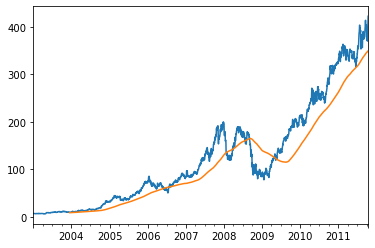

In [166]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

# 12. Advanced Pandas

## 12.1 Categorical Data

In [167]:
fruits = ['apple', 'orange', 'apple', 'apple'] * 2
N = len(fruits)

df = pd.DataFrame({'fruit': fruits,
                   'basket_id': np.arange(N),
                   'count': np.random.randint(3, 15, size=N),
                   'weight': np.random.uniform(0, 4, size=N)},
                 columns=['basket_id', 'fruit', 'count', 'weight'])
df

,basket_id,fruit,count,weight
0,0,apple,13,2.774962
1,1,orange,14,1.372715
2,2,apple,4,0.460111
3,3,apple,6,3.311340
4,4,apple,9,1.346114
5,5,orange,14,3.224975
6,6,apple,13,2.862122
7,7,apple,12,0.237900


In [168]:
df['fruit']

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: object

In [169]:
df['fruit'].name
df['fruit'].values

'fruit'

array(['apple', 'orange', 'apple', 'apple', 'apple', 'orange', 'apple',
       'apple'], dtype=object)

In [170]:
fruit_cat = df['fruit'].astype('category')
fruit_cat

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): [apple, orange]

In [171]:
type(fruit_cat)

pandas.core.series.Series

In [172]:
c = fruit_cat.values
type(c)
c.categories
c.codes

pandas.core.arrays.categorical.Categorical

Index(['apple', 'orange'], dtype='object')

array([0, 1, 0, 0, 0, 1, 0, 0], dtype=int8)

In [173]:
df['fruit'] = df['fruit'].astype('category')
df['fruit']

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): [apple, orange]

In [174]:
my_categories = pd.Categorical(['foo', 'bar', 'baz', 'foo', 'bar'])
my_categories

[foo, bar, baz, foo, bar]
Categories (3, object): [bar, baz, foo]

In [175]:
#constructing a Categorical from codes and values
categories = ['foo', 'bar', 'baz']
codes = [0, 1, 2, 0, 0, 1]
my_cats_2 = pd.Categorical.from_codes(codes, categories, ordered=True)
my_cats_2

[foo, bar, baz, foo, foo, bar]
Categories (3, object): [foo < bar < baz]

## Computations with Categoricals

In [176]:
np.random.seed(12345)
draws = np.random.randn(1000)
draws[:5]

array([-0.20470766,  0.47894334, -0.51943872, -0.5557303 ,  1.96578057])

In [177]:
bins = pd.qcut(draws, 4)
bins
bins.categories
bins.codes[:5]

[(-0.684, -0.0101], (-0.0101, 0.63], (-0.684, -0.0101], (-0.684, -0.0101], (0.63, 3.928], ..., (-0.0101, 0.63], (-0.684, -0.0101], (-2.9499999999999997, -0.684], (-0.0101, 0.63], (0.63, 3.928]]
Length: 1000
Categories (4, interval[float64]): [(-2.9499999999999997, -0.684] < (-0.684, -0.0101] < (-0.0101, 0.63] < (0.63, 3.928]]

IntervalIndex([(-2.9499999999999997, -0.684], (-0.684, -0.0101], (-0.0101, 0.63], (0.63, 3.928]],
              closed='right',
              dtype='interval[float64]')

array([1, 2, 1, 1, 3], dtype=int8)

In [178]:
bins = pd.qcut(draws, 4, labels = ['Q1', 'Q2', 'Q3', 'Q4'])
bins

[Q2, Q3, Q2, Q2, Q4, ..., Q3, Q2, Q1, Q3, Q4]
Length: 1000
Categories (4, object): [Q1 < Q2 < Q3 < Q4]

In [179]:
bins = pd.Series(bins, name='Quartile')

results = pd.Series(draws).groupby(bins).agg(['count', 'min', 'max']).reset_index()
results

,Quartile,count,min,max
0,Q1,250,-2.949343,-0.685484
1,Q2,250,-0.683066,-0.010115
2,Q3,250,-0.010032,0.628894
3,Q4,250,0.634238,3.927528


In [180]:
results.Quartile

0    Q1
1    Q2
2    Q3
3    Q4
Name: Quartile, dtype: category
Categories (4, object): [Q1 < Q2 < Q3 < Q4]

In [181]:
results.Quartile.cat.categories
results.Quartile.cat.codes

Index(['Q1', 'Q2', 'Q3', 'Q4'], dtype='object')

0    0
1    1
2    2
3    3
dtype: int8

## Categorical Methods

In [182]:
s = pd.Series(['a', 'b', 'c', 'd'] * 2)
cat_s = s.astype('category')
cat_s

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (4, object): [a, b, c, d]

In [183]:
cat_s.cat.codes
cat_s.cat.categories

0    0
1    1
2    2
3    3
4    0
5    1
6    2
7    3
dtype: int8

Index(['a', 'b', 'c', 'd'], dtype='object')

In [184]:
cat_s = pd.Series(['a', 'b', 'c', 'd'] * 2, dtype='category')
cat_s

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (4, object): [a, b, c, d]

In [185]:
pd.get_dummies(cat_s)

,a,b,c,d
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1


## 12.2 Advanced GroupBy Use

In [186]:
df = pd.DataFrame({'key': ['a', 'b', 'c'] * 4,
                   'value': np.arange(12.)})
df

,key,value
0,a,0.0
1,b,1.0
2,c,2.0
3,a,3.0
4,b,4.0
5,c,5.0
6,a,6.0
7,b,7.0
8,c,8.0
9,a,9.0


In [187]:
g = df.groupby('key').value
type(g)

pandas.core.groupby.generic.SeriesGroupBy

In [188]:
g.mean()

key
a    4.5
b    5.5
c    6.5
Name: value, dtype: float64

In [189]:
g.std()

key
a    3.872983
b    3.872983
c    3.872983
Name: value, dtype: float64

In [190]:
type(g.mean())

pandas.core.series.Series

In [191]:
g.transform('mean')

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

In [192]:
def normalize(x):
    return (x - x.mean()) / x.std()

In [193]:
g.transform(normalize)

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64

# 13. Introduction to Modeling Libraries in Python